# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [1]:
config_file = "../config_sim_all-models-5_20240413"
data_str = "20240413"

# set up example
sim_no = 1
n_train = 1000
noise_sd = 0.1

In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generation import generate_data, Groundtruth

In [3]:
config = ConfigParser()
config.read(config_file)

['../config_sim_all-models-5_20240413']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

index                                   model_id                  model  \
0       0  RandomForestRegressor_20240413_1_1000_0.1  RandomForestRegressor   
1       0           XGBRegressor_20240413_1_1000_0.1           XGBRegressor   
2       0  DecisionTreeRegressor_20240413_1_1000_0.1  DecisionTreeRegressor   
3       0                    SVR_20240413_1_1000_0.1                    SVR   
4       0             ElasticNet_20240413_1_1000_0.1             ElasticNet   
5       0                    GAM_20240413_1_1000_0.1                    GAM   
6       0  RandomForestRegressor_20240413_1_1000_0.5  RandomForestRegressor   
7       0           XGBRegressor_20240413_1_1000_0.5           XGBRegressor   
8       0  DecisionTreeRegressor_20240413_1_1000_0.5  DecisionTreeRegressor   
9       0                    SVR_20240413_1_1000_0.5                    SVR   
10      0             ElasticNet_20240413_1_1000_0.5             ElasticNet   
11      0                    GAM_20240413_1_1000_0.5                    GAM   
12      0  RandomForestRegressor_20240413_2_1000_0.1  RandomForestRegressor   
13      0           XGBRegressor_20240413_2_1000_0.1           XGBRegressor   
14      0  DecisionTreeRegressor_20240413_2_1000_0.1  DecisionTreeRegressor   
15      0                    SVR_20240413_2_1000_0.1                    SVR   
16      0             ElasticNet_20240413_2_1000_0.1             ElasticNet   
17      0                    GAM_20240413_2_1000_0.1                    GAM   
18      0  RandomForestRegressor_20240413_2_1000_0.5  RandomForestRegressor   
19      0           XGBRegressor_20240413_2_1000_0.5           XGBRegressor   
20      0  DecisionTreeRegressor_20240413_2_1000_0.5  DecisionTreeRegressor   
21      0                    SVR_20240413_2_1000_0.5                    SVR   
22      0             ElasticNet_20240413_2_1000_0.5             ElasticNet   
23      0                    GAM_20240413_2_1000_0.5                    GAM   
24      0  RandomForestRegressor_20240413_3_1000_0.1  RandomForestRegressor   
25      0           XGBRegressor_20240413_3_1000_0.1           XGBRegressor   
26      0  DecisionTreeRegressor_20240413_3_1000_0.1  DecisionTreeRegressor   
27      0                    SVR_20240413_3_1000_0.1                    SVR   
28      0             ElasticNet_20240413_3_1000_0.1             ElasticNet   
29      0                    GAM_20240413_3_1000_0.1                    GAM   
30      0  RandomForestRegressor_20240413_3_1000_0.5  RandomForestRegressor   
31      0           XGBRegressor_20240414_3_1000_0.5           XGBRegressor   
32      0  DecisionTreeRegressor_20240414_3_1000_0.5  DecisionTreeRegressor   
33      0                    SVR_20240414_3_1000_0.5                    SVR   
34      0             ElasticNet_20240414_3_1000_0.5             ElasticNet   
35      0                    GAM_20240414_3_1000_0.5                    GAM   
36      0  RandomForestRegressor_20240414_4_1000_0.1  RandomForestRegressor   
37      0           XGBRegressor_20240414_4_1000_0.1           XGBRegressor   
38      0  DecisionTreeRegressor_20240414_4_1000_0.1  DecisionTreeRegressor   
39      0                    SVR_20240414_4_1000_0.1                    SVR   
40      0             ElasticNet_20240414_4_1000_0.1             ElasticNet   
41      0                    GAM_20240414_4_1000_0.1                    GAM   
42      0  RandomForestRegressor_20240414_4_1000_0.5  RandomForestRegressor   
43      0           XGBRegressor_20240414_4_1000_0.5           XGBRegressor   
44      0  DecisionTreeRegressor_20240414_4_1000_0.5  DecisionTreeRegressor   
45      0                    SVR_20240414_4_1000_0.5                    SVR   
46      0             ElasticNet_20240414_4_1000_0.5             ElasticNet   
47      0                    GAM_20240414_4_1000_0.5                    GAM   
48      0  RandomForestRegressor_20240414_5_1000_0.1  RandomForestRegressor   
49      0           XGBRegressor_20240414_5_1000_0.1  

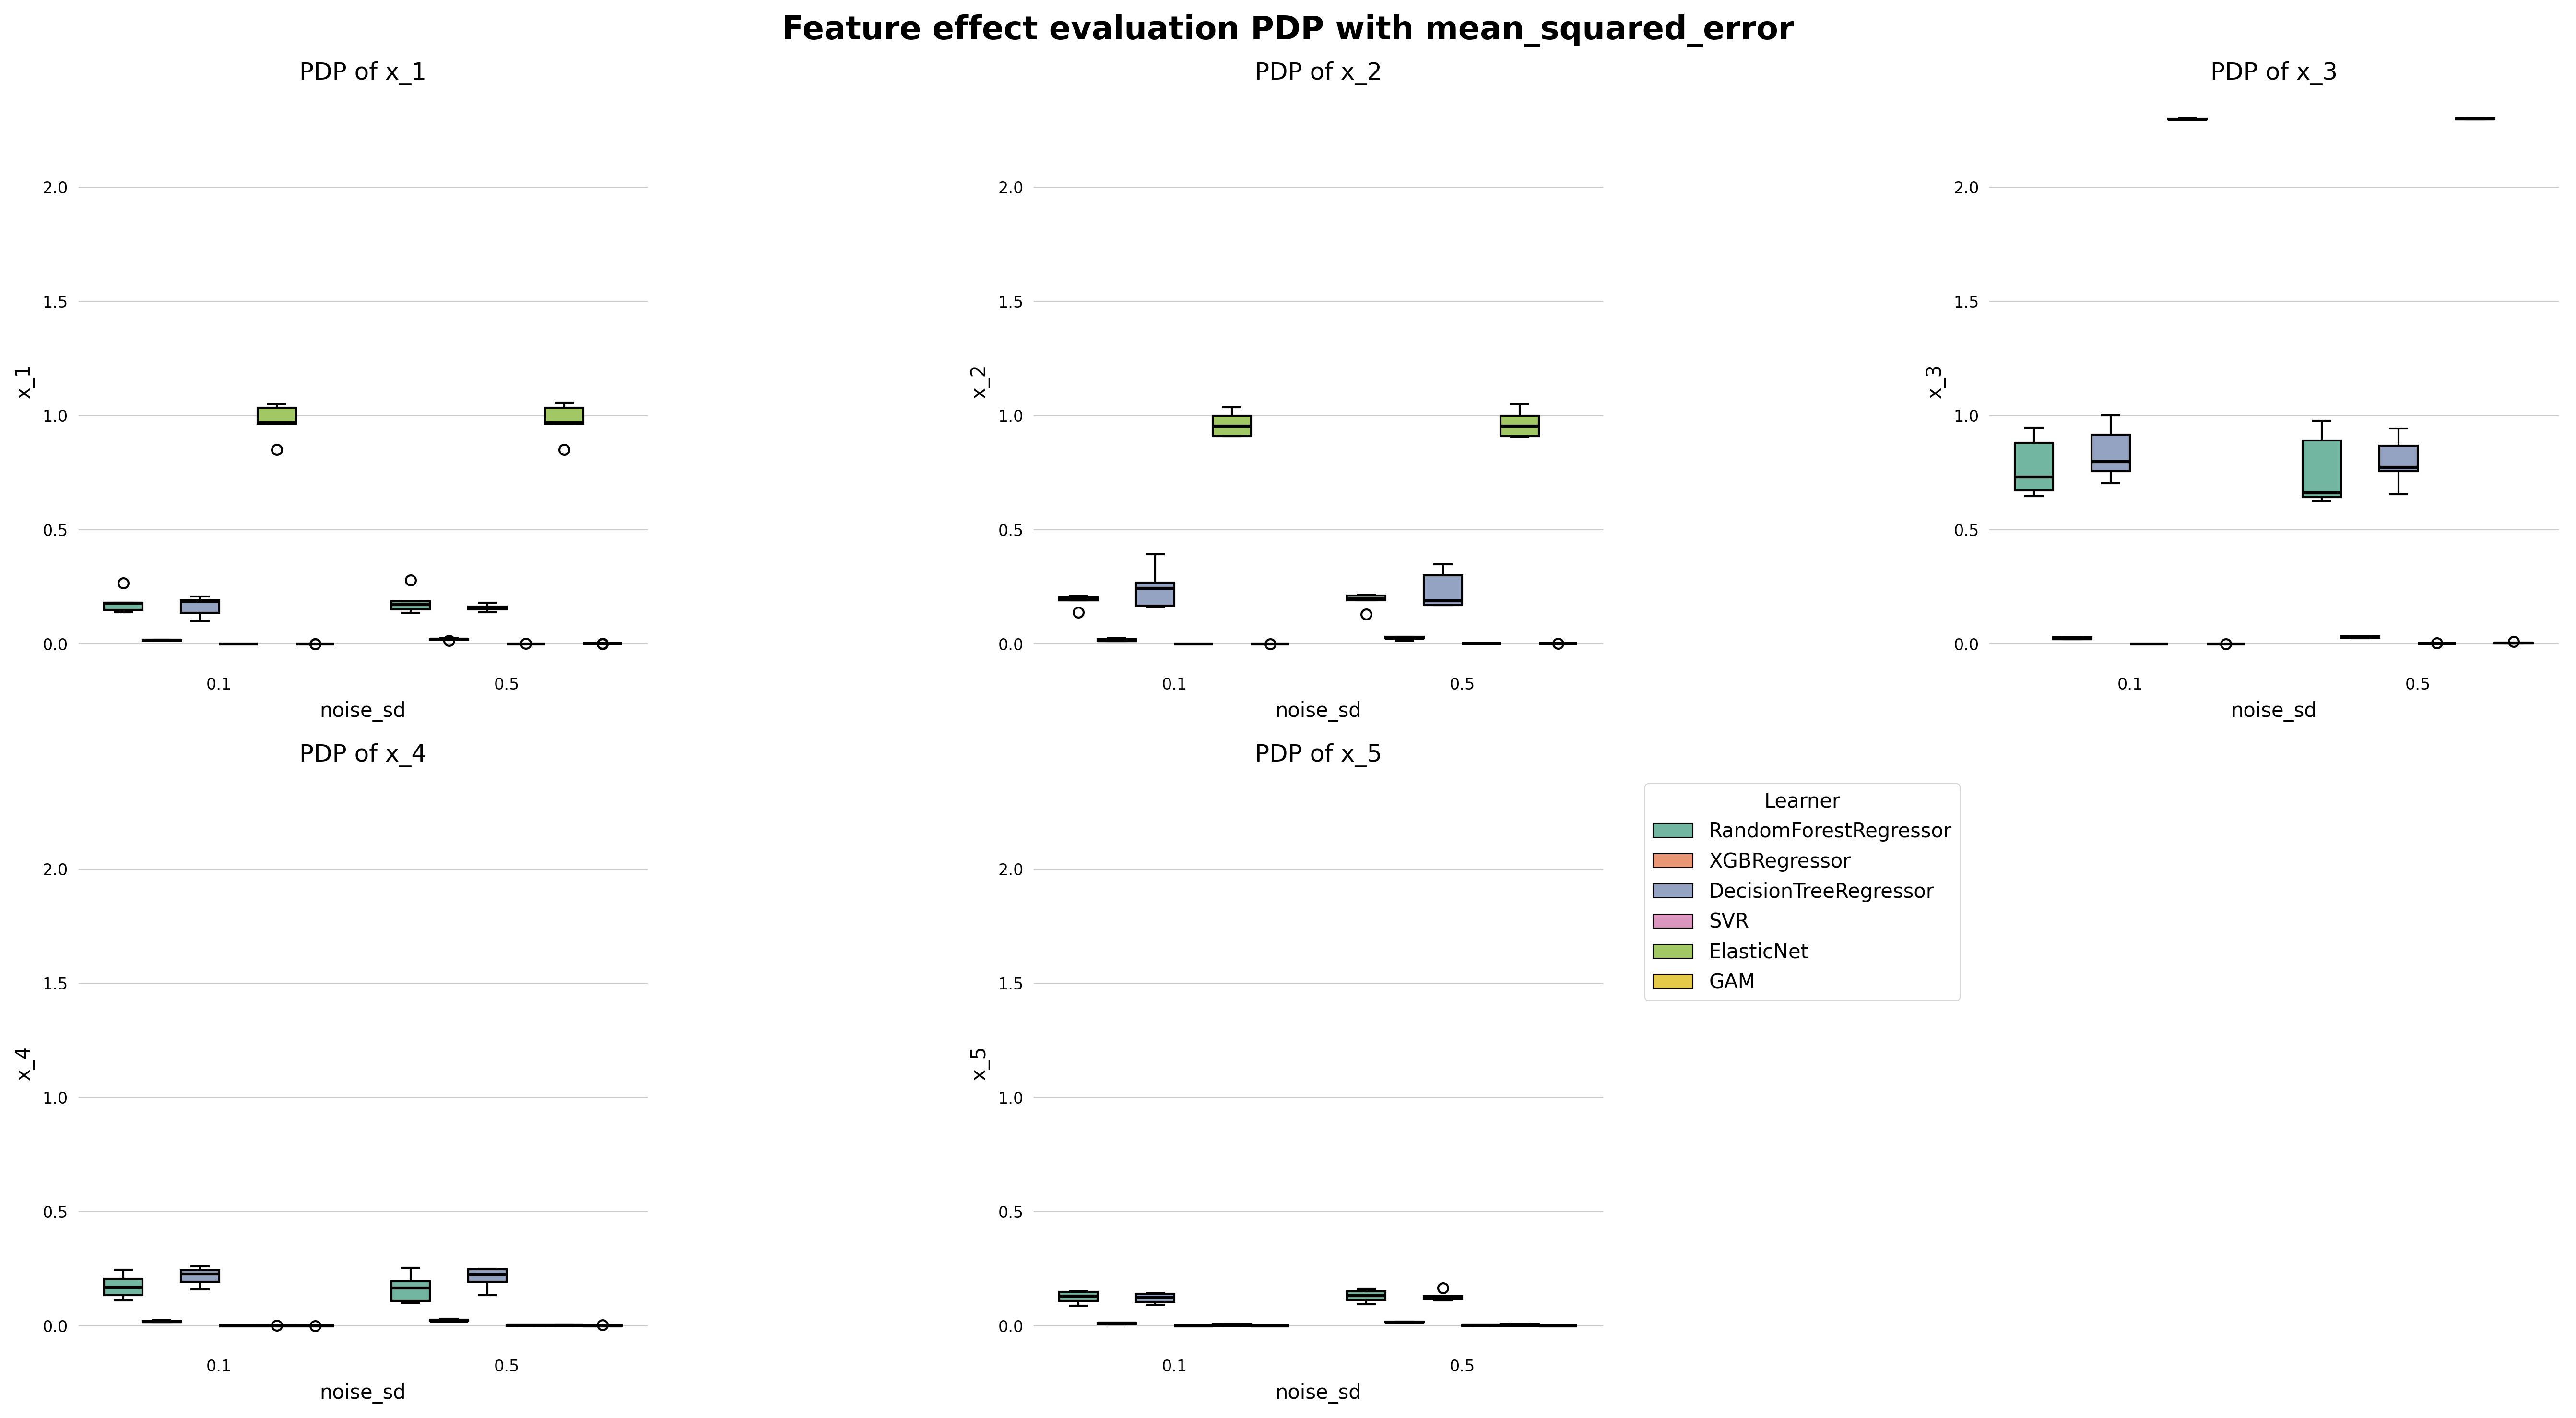

In [5]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="PDP");

### PDP example visualizations

In [6]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={noise_sd})")

(simulation no. 1 with n_train=1000 and noise_sd=0.1)

In [7]:
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(1000, 1000, 0.1, seed=1)
# init groundtruth
groundtruth = Groundtruth()
# load models
rf = load(f'../models/RandomForestRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
xgb = load(f'../models/XGBRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
tree = load(f'../models/DecisionTreeRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
svm = load(f'../models/SVR_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
elasticnet = load(f'../models/ElasticNet_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
gam = load(f'../models/GAM_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


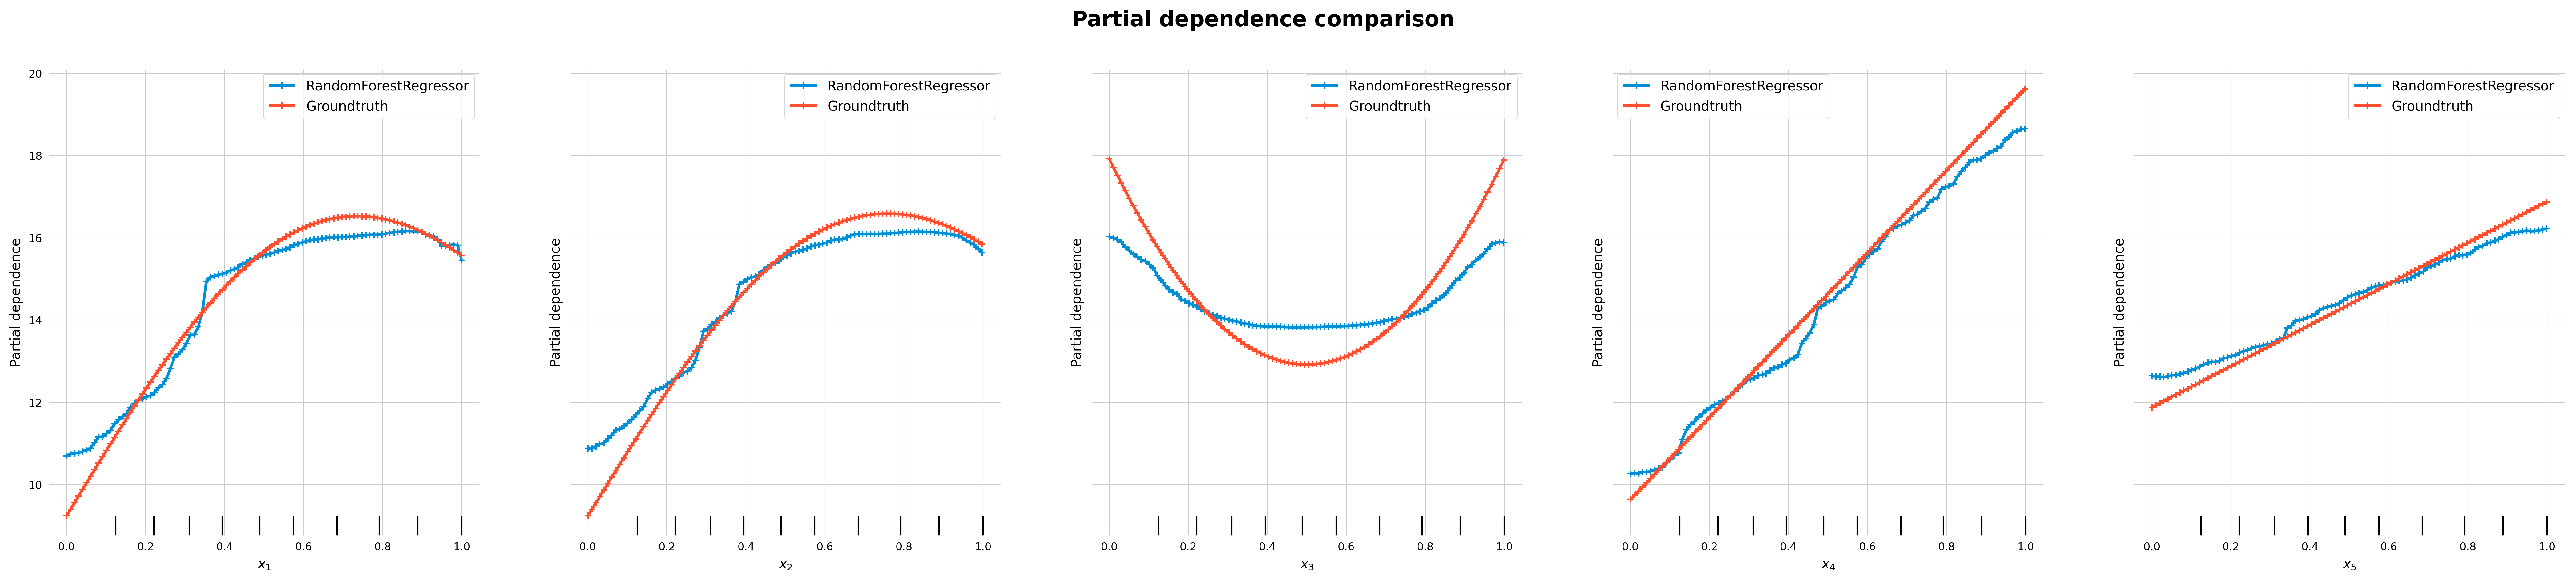

In [8]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

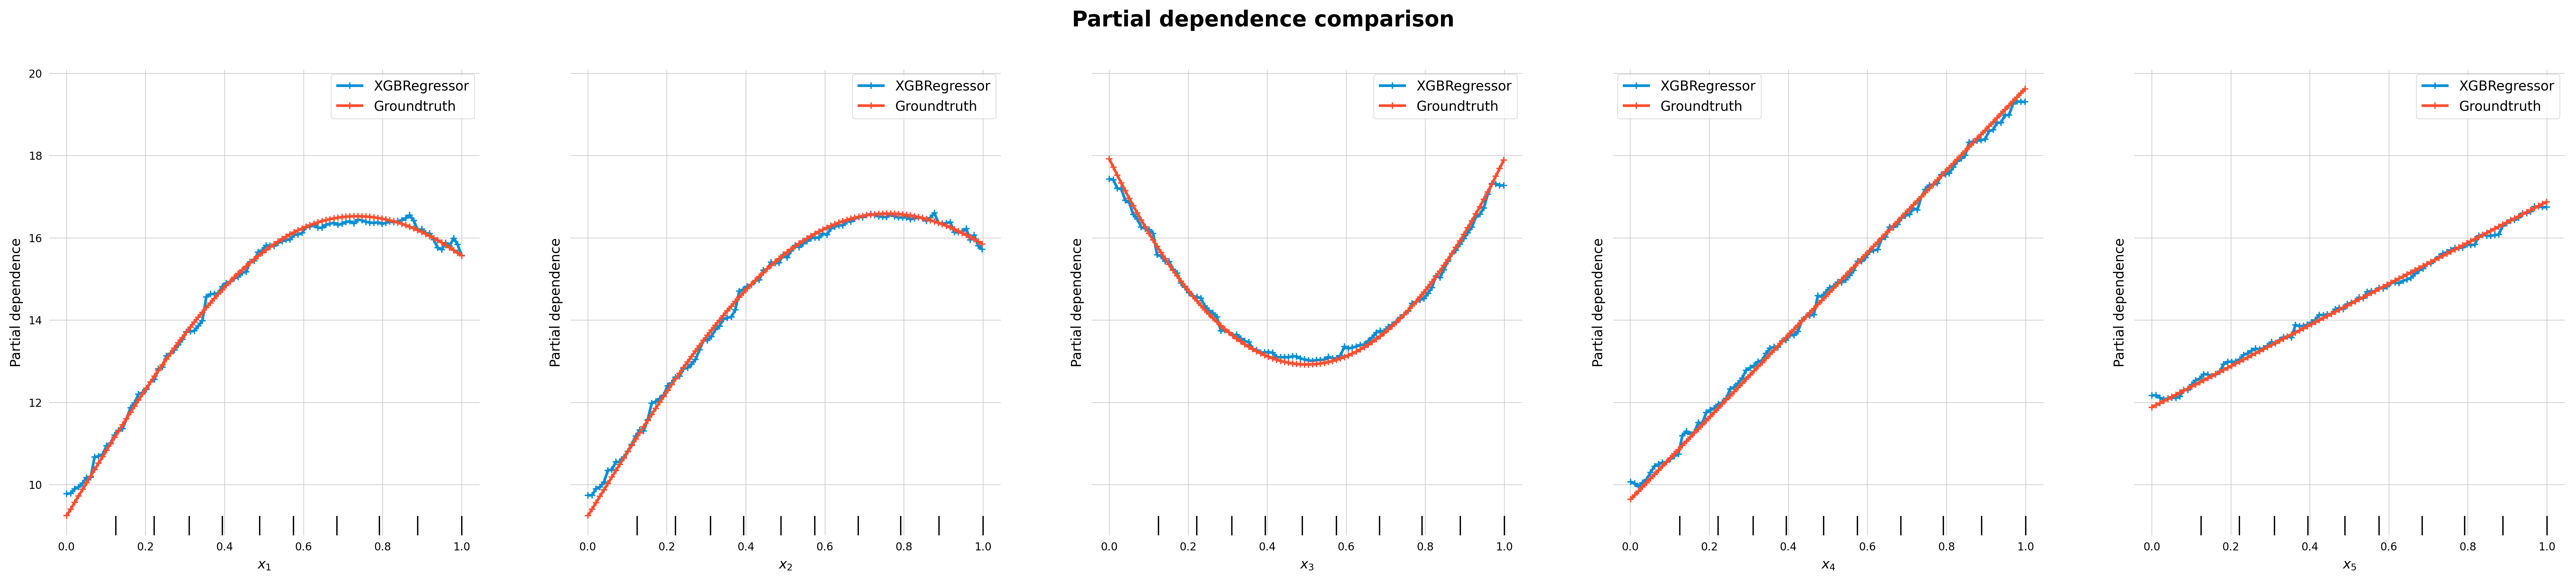

In [9]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

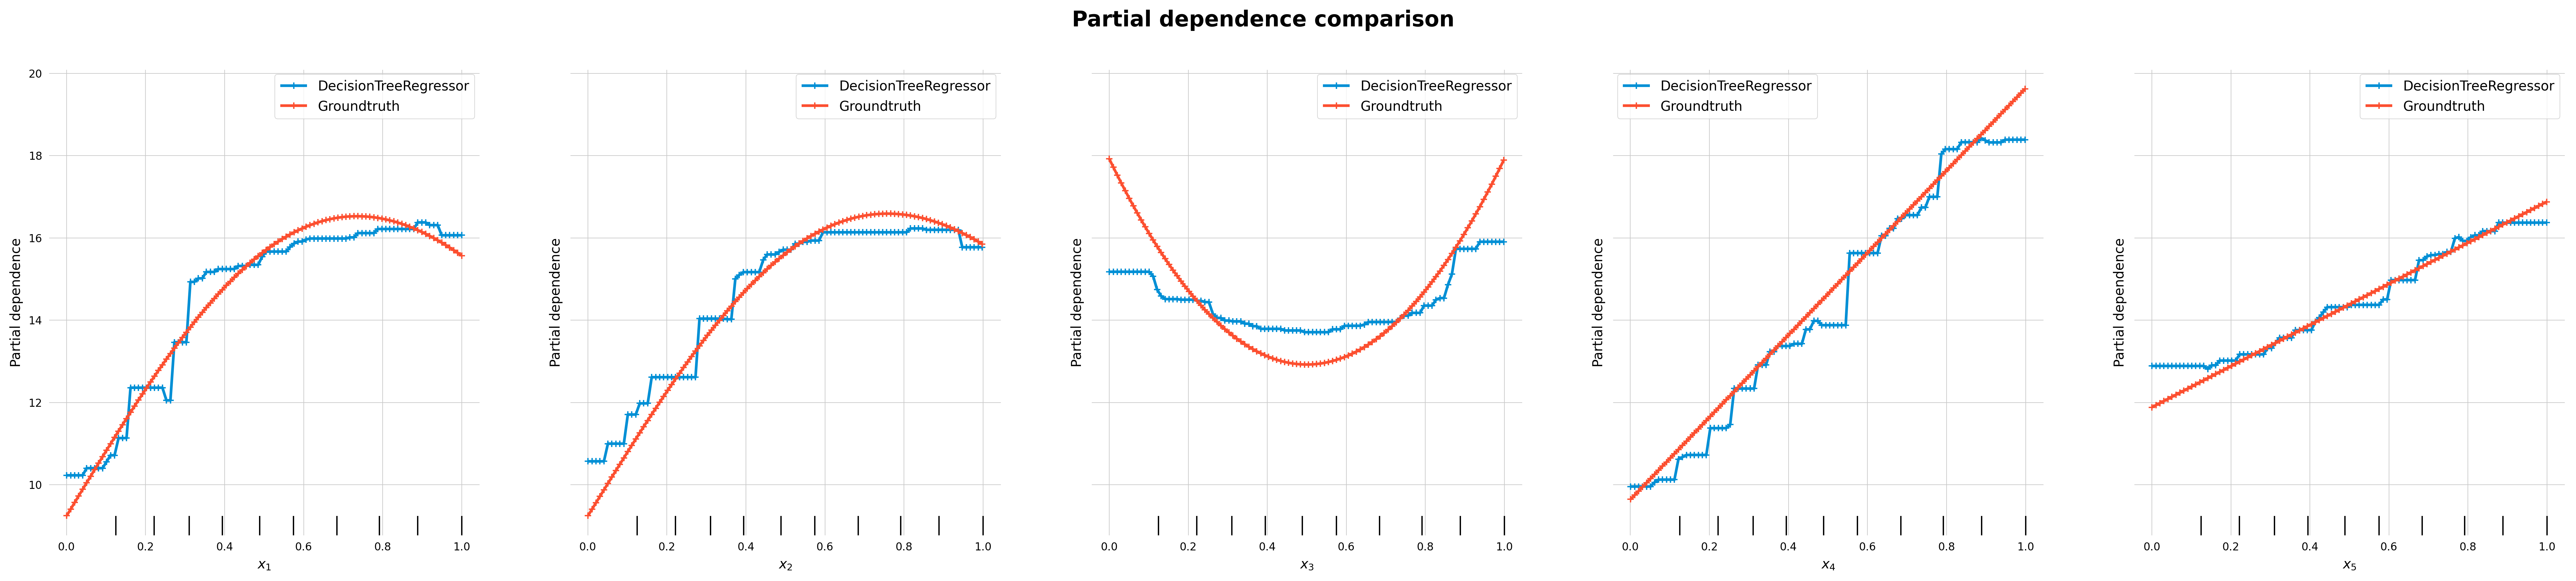

In [10]:
%matplotlib inline
plot_effect_comparison(tree, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

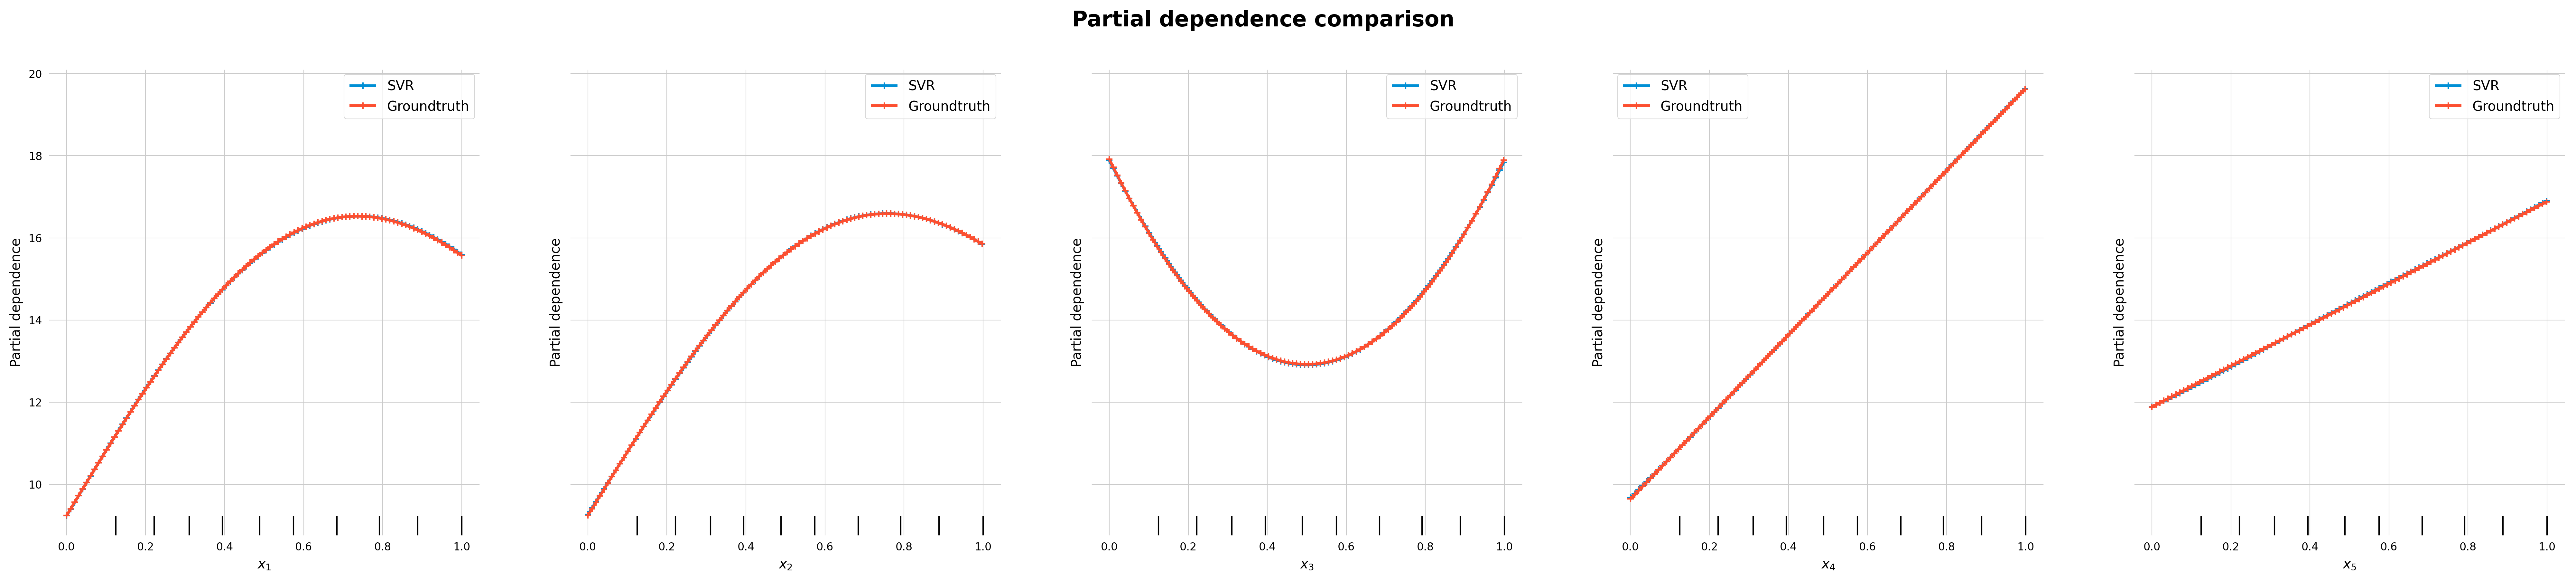

In [11]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

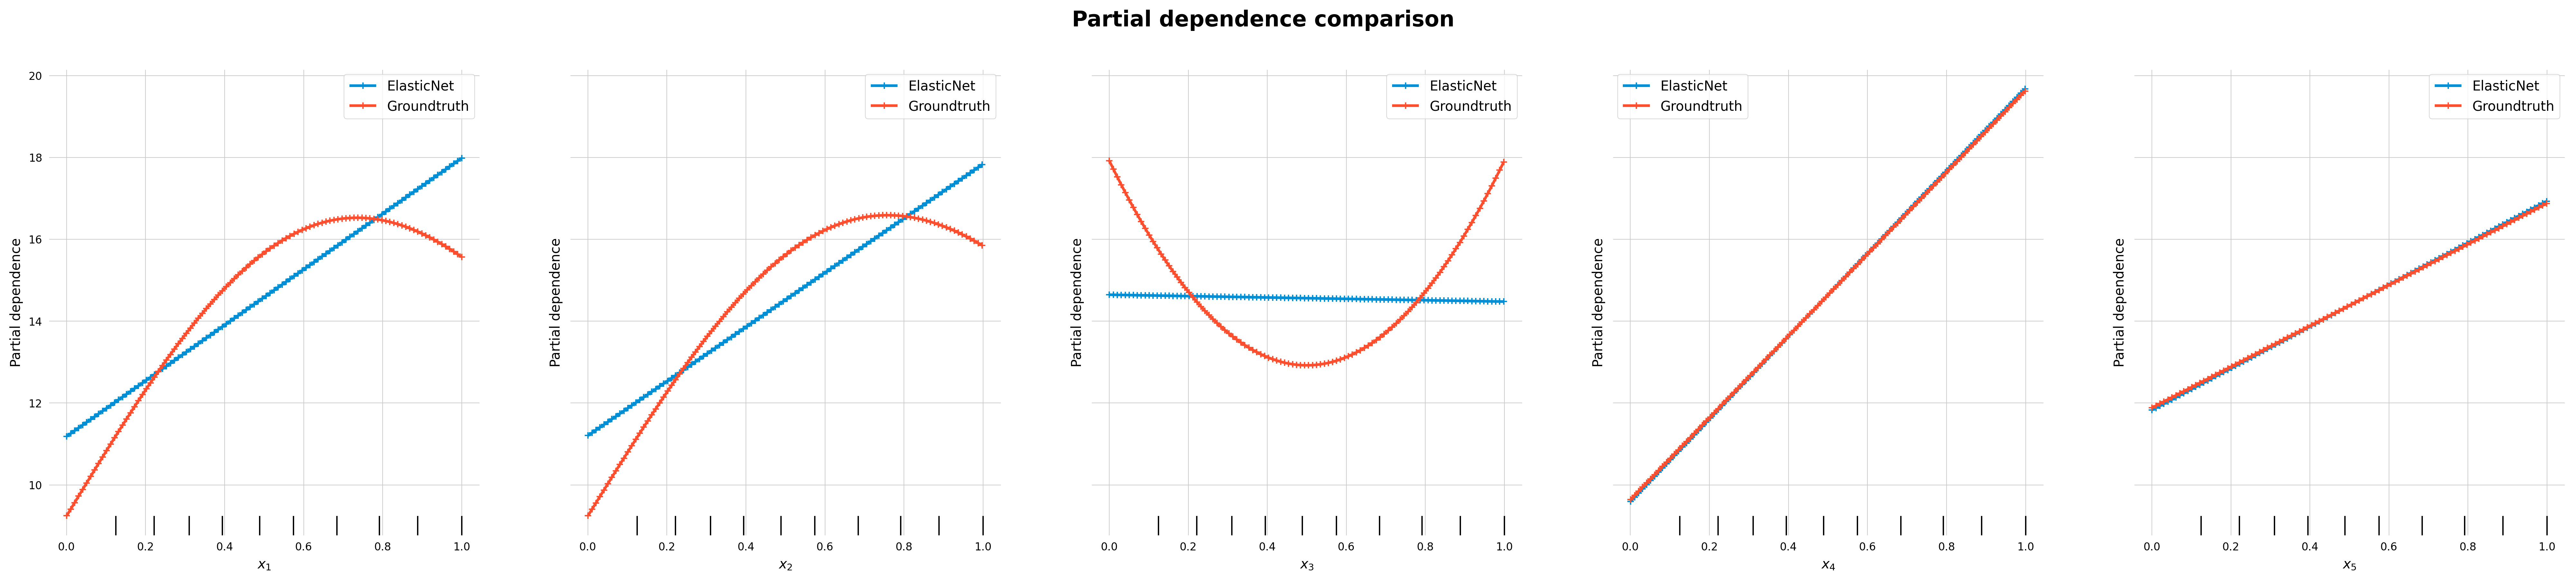

In [12]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

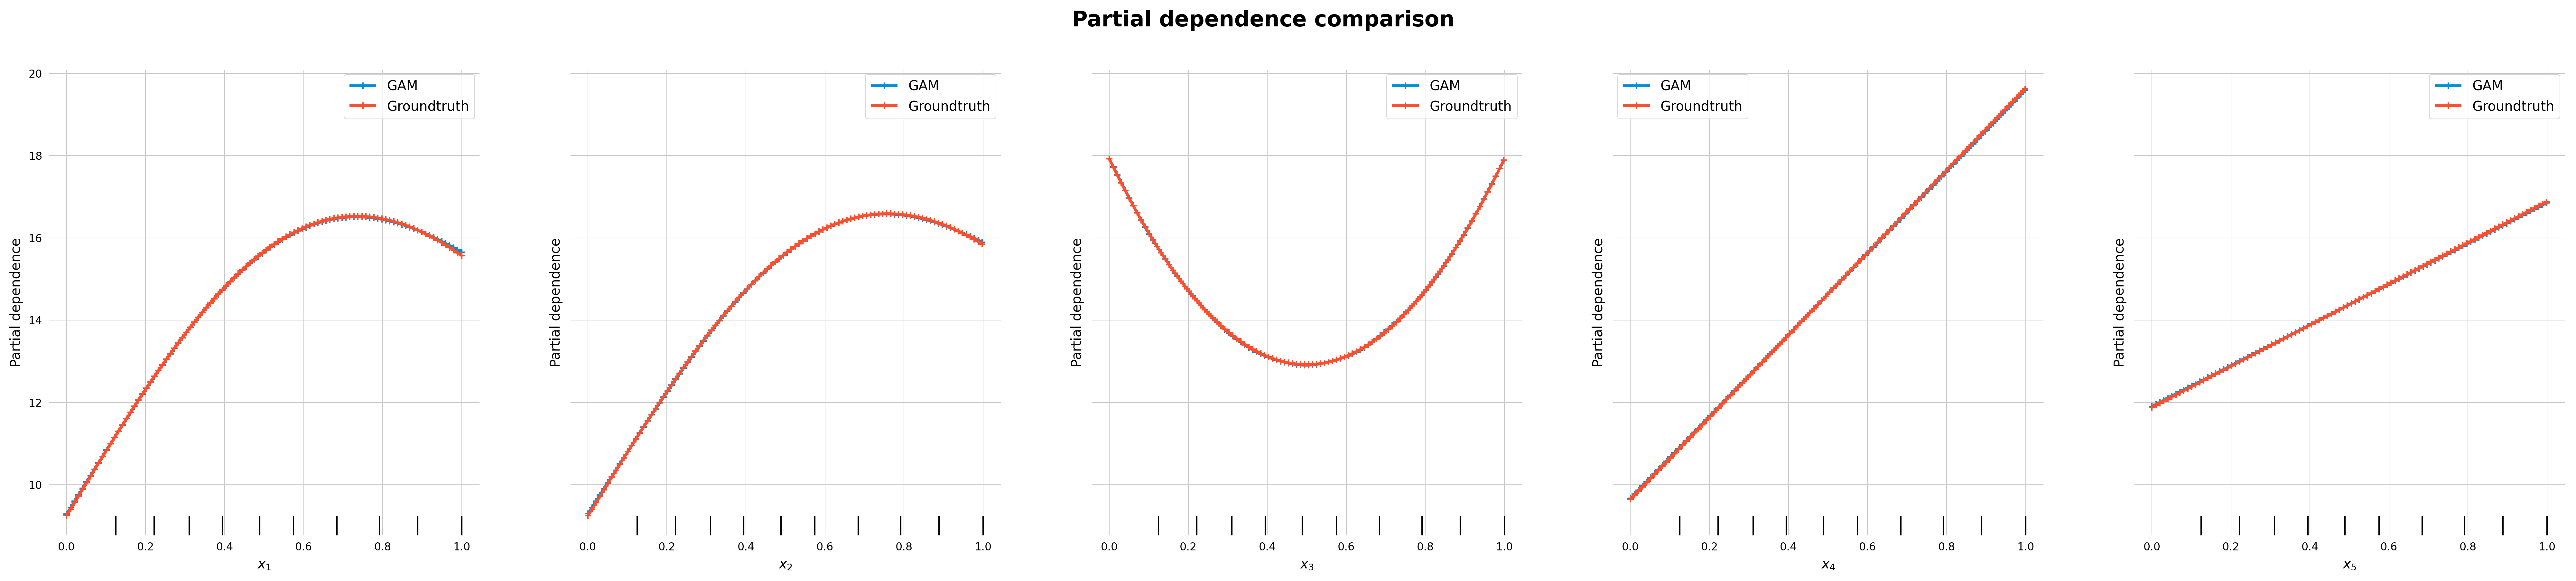

In [13]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [14]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

index                                   model_id                  model  \
0       0  RandomForestRegressor_20240413_1_1000_0.1  RandomForestRegressor   
1       0           XGBRegressor_20240413_1_1000_0.1           XGBRegressor   
2       0  DecisionTreeRegressor_20240413_1_1000_0.1  DecisionTreeRegressor   
3       0                    SVR_20240413_1_1000_0.1                    SVR   
4       0             ElasticNet_20240413_1_1000_0.1             ElasticNet   
5       0                    GAM_20240413_1_1000_0.1                    GAM   
6       0  RandomForestRegressor_20240413_1_1000_0.5  RandomForestRegressor   
7       0           XGBRegressor_20240413_1_1000_0.5           XGBRegressor   
8       0  DecisionTreeRegressor_20240413_1_1000_0.5  DecisionTreeRegressor   
9       0                    SVR_20240413_1_1000_0.5                    SVR   
10      0             ElasticNet_20240413_1_1000_0.5             ElasticNet   
11      0                    GAM_20240413_1_1000_0.5                    GAM   
12      0  RandomForestRegressor_20240413_2_1000_0.1  RandomForestRegressor   
13      0           XGBRegressor_20240413_2_1000_0.1           XGBRegressor   
14      0  DecisionTreeRegressor_20240413_2_1000_0.1  DecisionTreeRegressor   
15      0                    SVR_20240413_2_1000_0.1                    SVR   
16      0             ElasticNet_20240413_2_1000_0.1             ElasticNet   
17      0                    GAM_20240413_2_1000_0.1                    GAM   
18      0  RandomForestRegressor_20240413_2_1000_0.5  RandomForestRegressor   
19      0           XGBRegressor_20240413_2_1000_0.5           XGBRegressor   
20      0  DecisionTreeRegressor_20240413_2_1000_0.5  DecisionTreeRegressor   
21      0                    SVR_20240413_2_1000_0.5                    SVR   
22      0             ElasticNet_20240413_2_1000_0.5             ElasticNet   
23      0                    GAM_20240413_2_1000_0.5                    GAM   
24      0  RandomForestRegressor_20240413_3_1000_0.1  RandomForestRegressor   
25      0           XGBRegressor_20240413_3_1000_0.1           XGBRegressor   
26      0  DecisionTreeRegressor_20240413_3_1000_0.1  DecisionTreeRegressor   
27      0                    SVR_20240413_3_1000_0.1                    SVR   
28      0             ElasticNet_20240413_3_1000_0.1             ElasticNet   
29      0                    GAM_20240413_3_1000_0.1                    GAM   
30      0  RandomForestRegressor_20240413_3_1000_0.5  RandomForestRegressor   
31      0           XGBRegressor_20240414_3_1000_0.5           XGBRegressor   
32      0  DecisionTreeRegressor_20240414_3_1000_0.5  DecisionTreeRegressor   
33      0                    SVR_20240414_3_1000_0.5                    SVR   
34      0             ElasticNet_20240414_3_1000_0.5             ElasticNet   
35      0                    GAM_20240414_3_1000_0.5                    GAM   
36      0  RandomForestRegressor_20240414_4_1000_0.1  RandomForestRegressor   
37      0           XGBRegressor_20240414_4_1000_0.1           XGBRegressor   
38      0  DecisionTreeRegressor_20240414_4_1000_0.1  DecisionTreeRegressor   
39      0                    SVR_20240414_4_1000_0.1                    SVR   
40      0             ElasticNet_20240414_4_1000_0.1             ElasticNet   
41      0                    GAM_20240414_4_1000_0.1                    GAM   
42      0  RandomForestRegressor_20240414_4_1000_0.5  RandomForestRegressor   
43      0           XGBRegressor_20240414_4_1000_0.5           XGBRegressor   
44      0  DecisionTreeRegressor_20240414_4_1000_0.5  DecisionTreeRegressor   
45      0                    SVR_20240414_4_1000_0.5                    SVR   
46      0             ElasticNet_20240414_4_1000_0.5             ElasticNet   
47      0                    GAM_20240414_4_1000_0.5                    GAM   
48      0  RandomForestRegressor_20240414_5_1000_0.1  RandomForestRegressor   
49      0           XGBRegressor_20240414_5_1000_0.1  

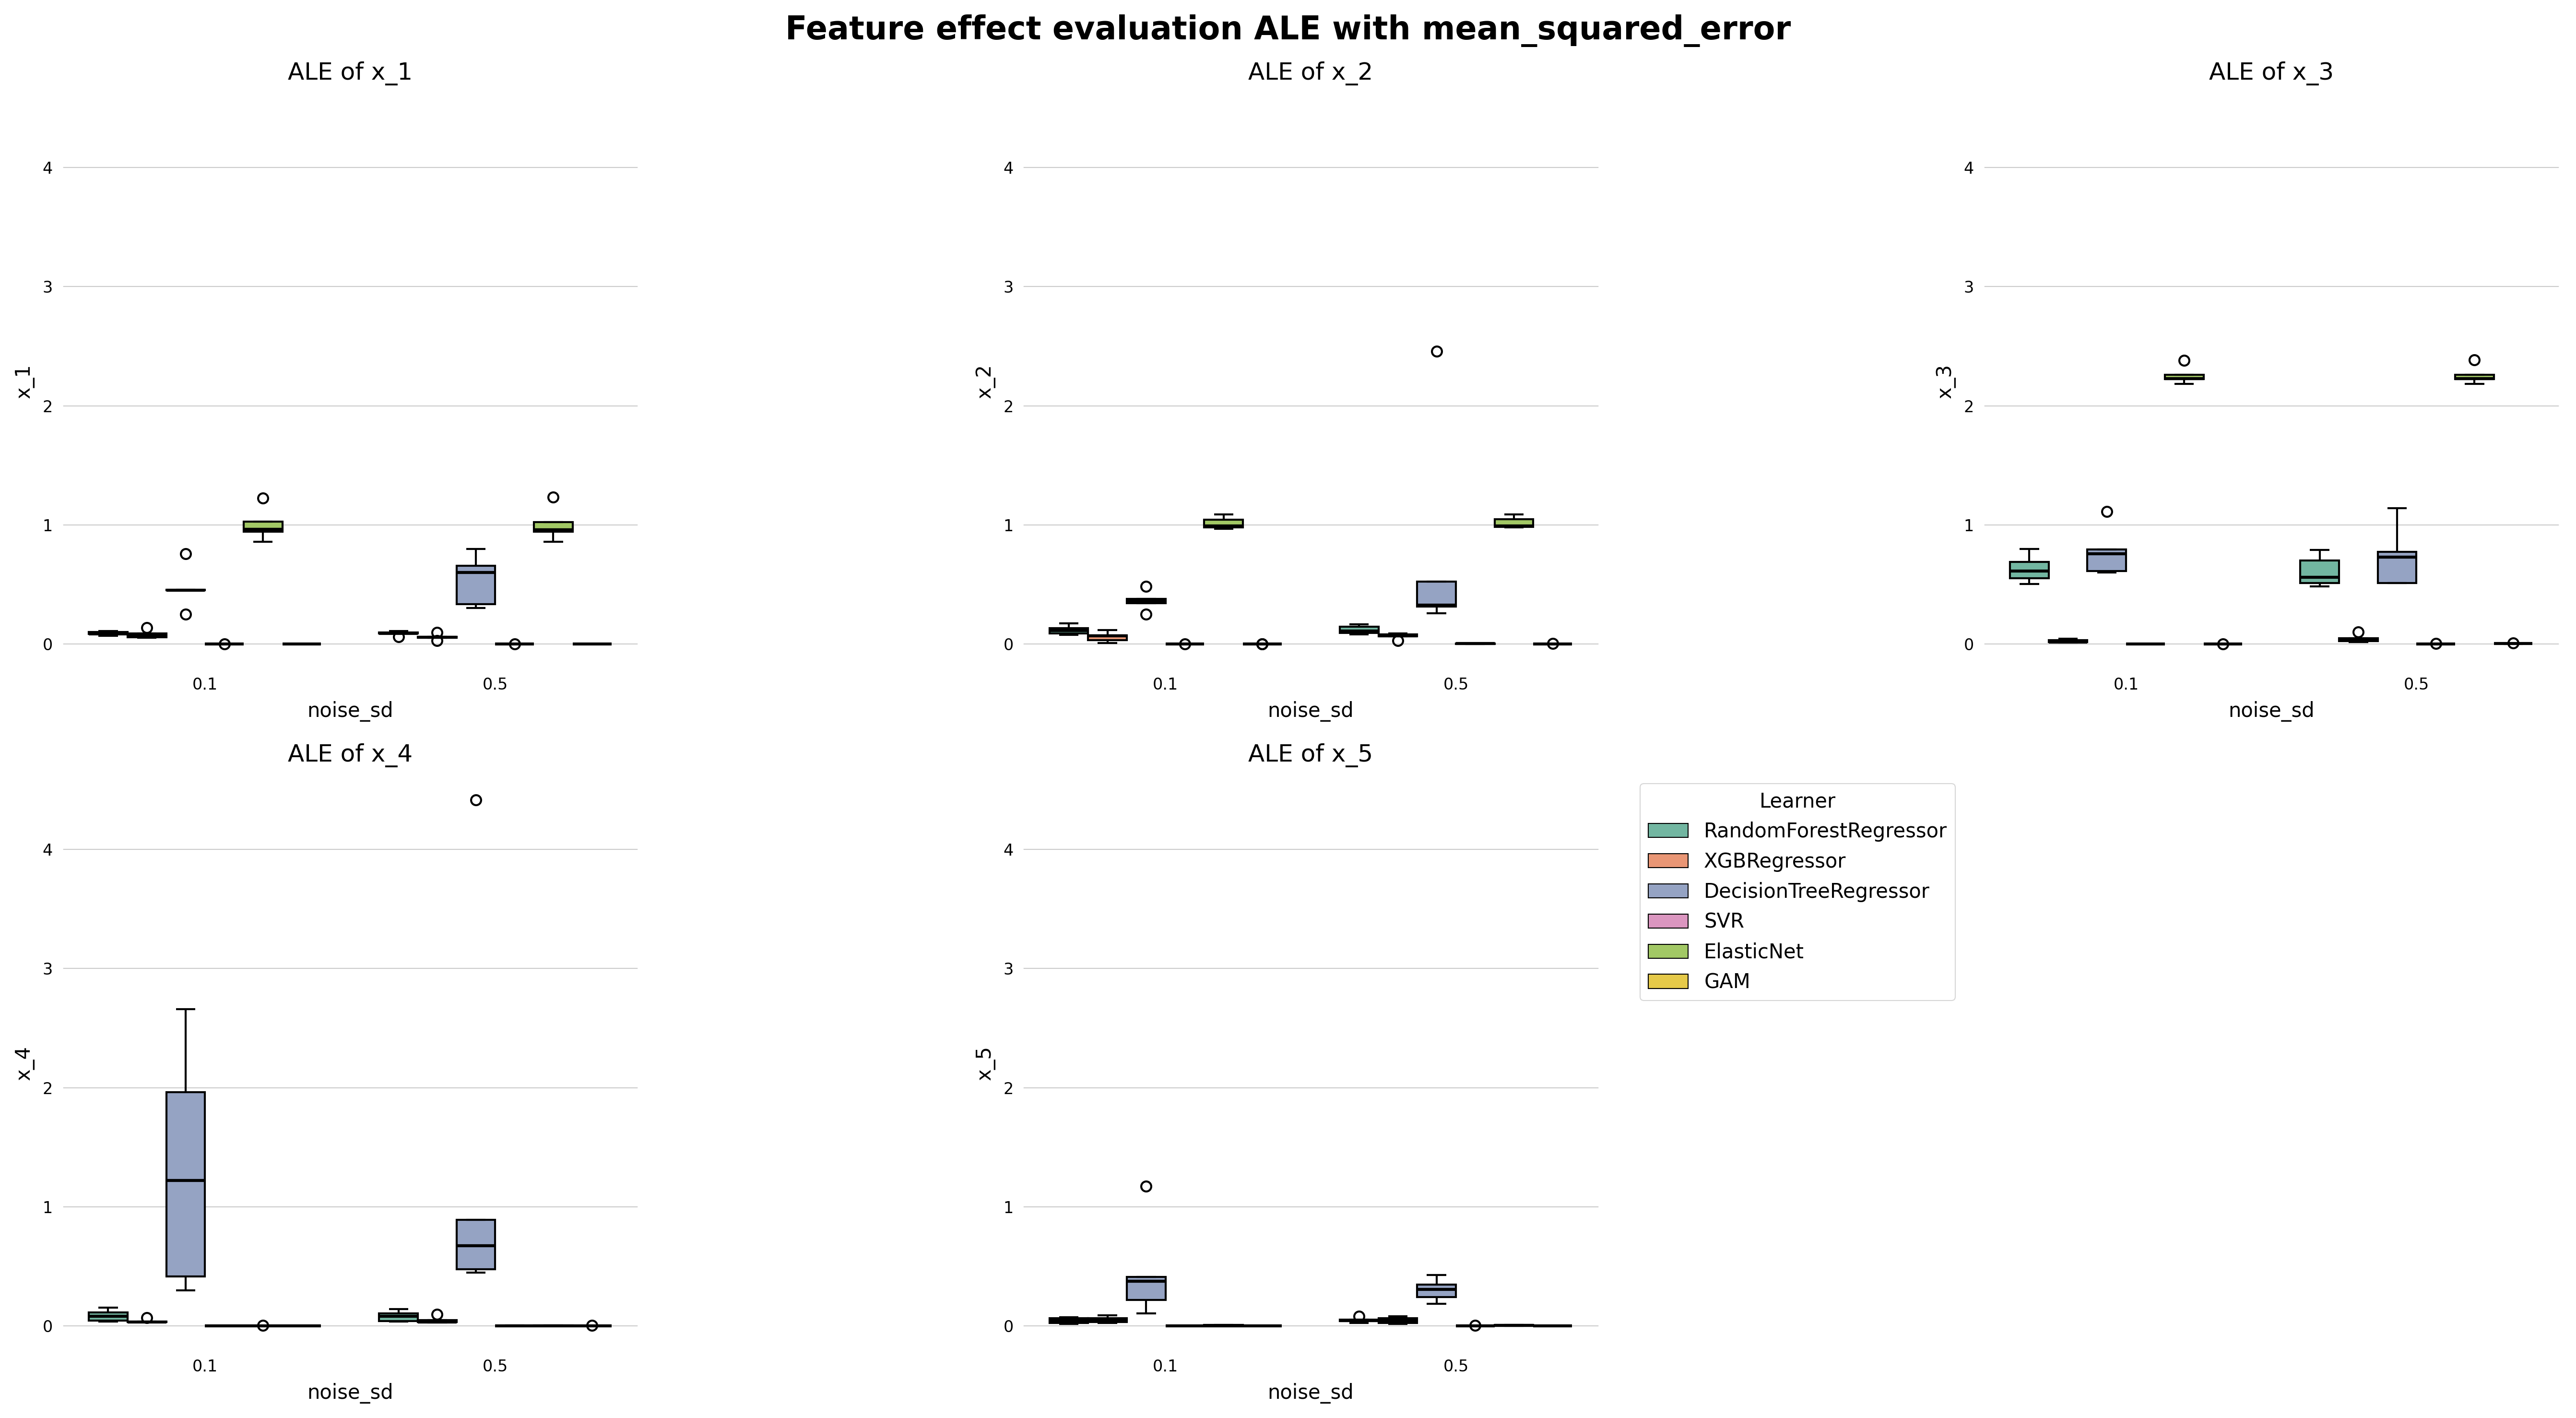

In [15]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="ALE");

### ALE example visualizations

In [16]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={noise_sd})")

(simulation no. 1 with n_train=1000 and noise_sd=0.1)

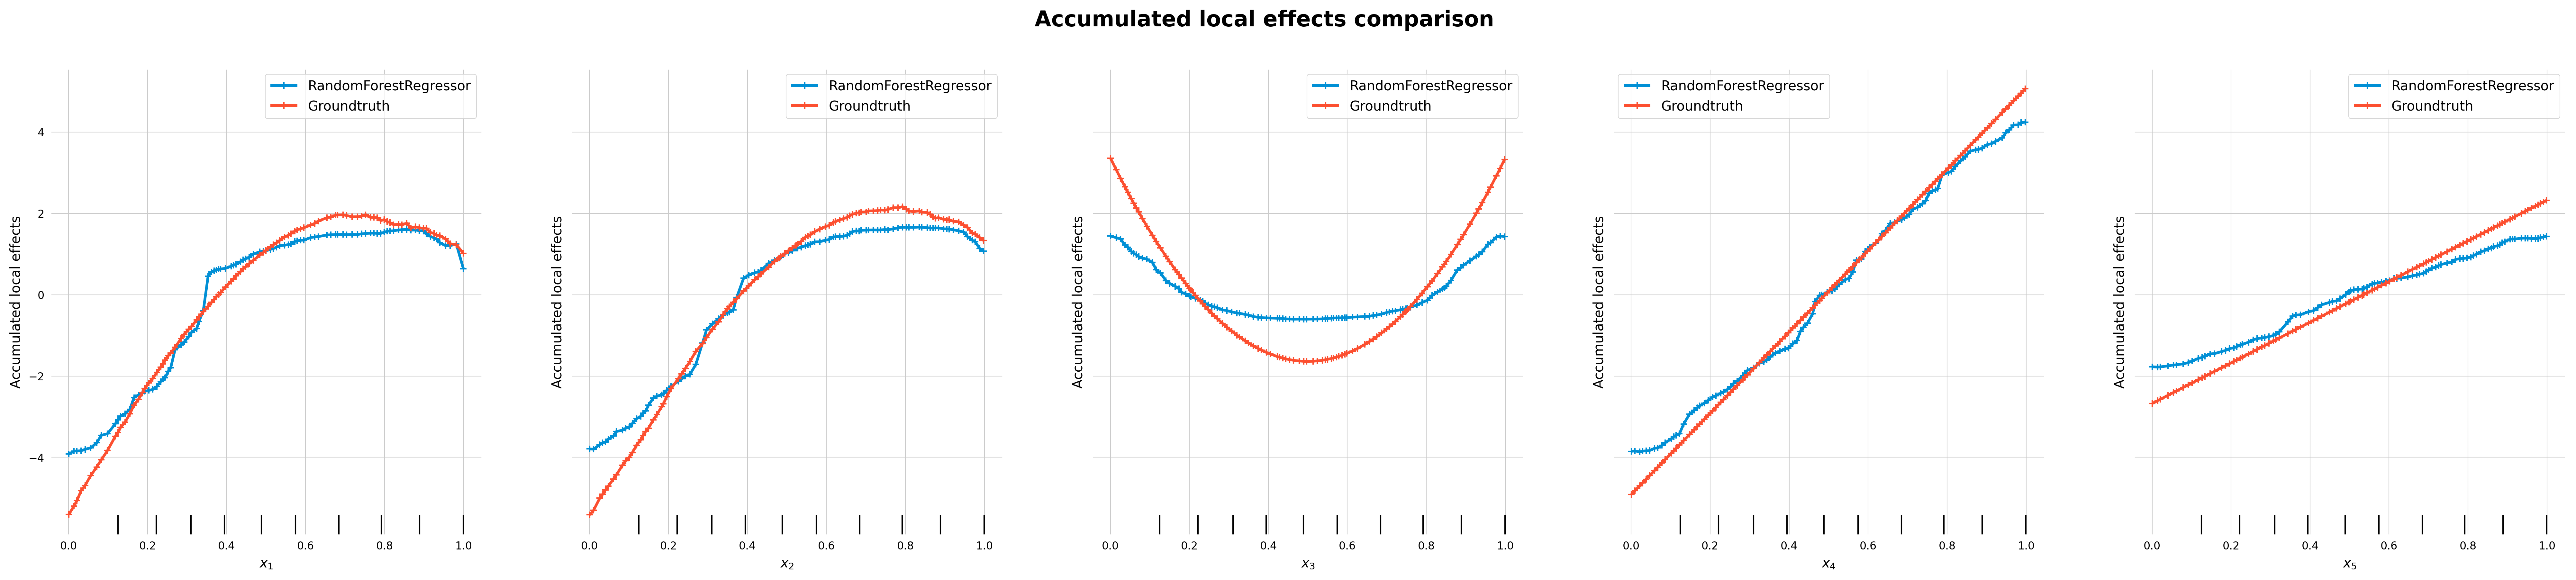

In [17]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

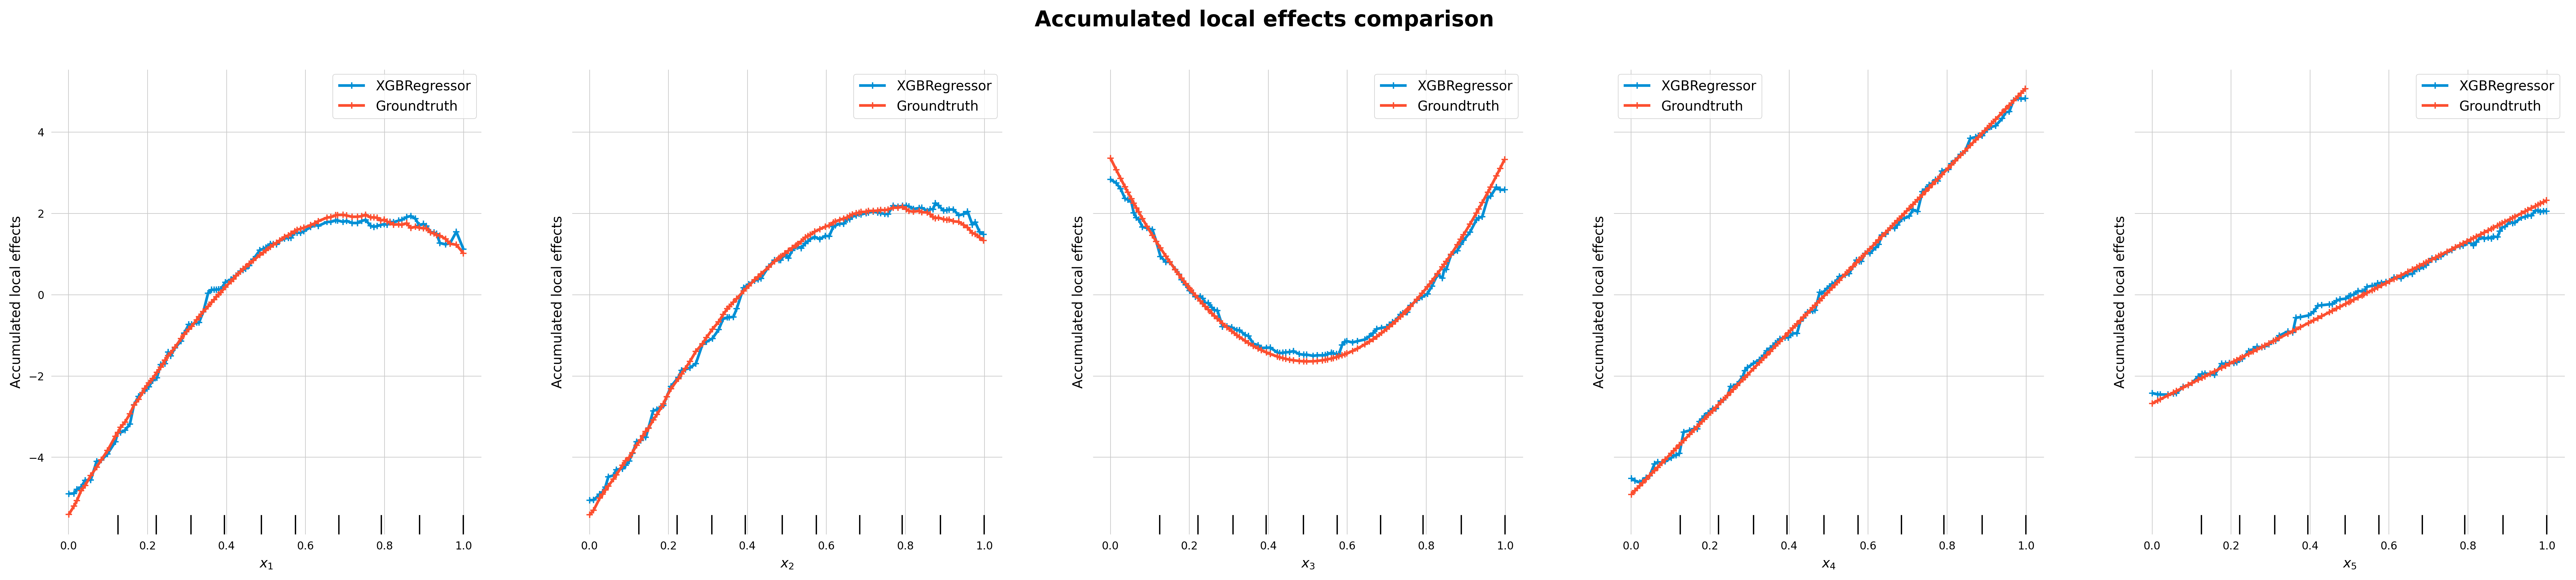

In [18]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

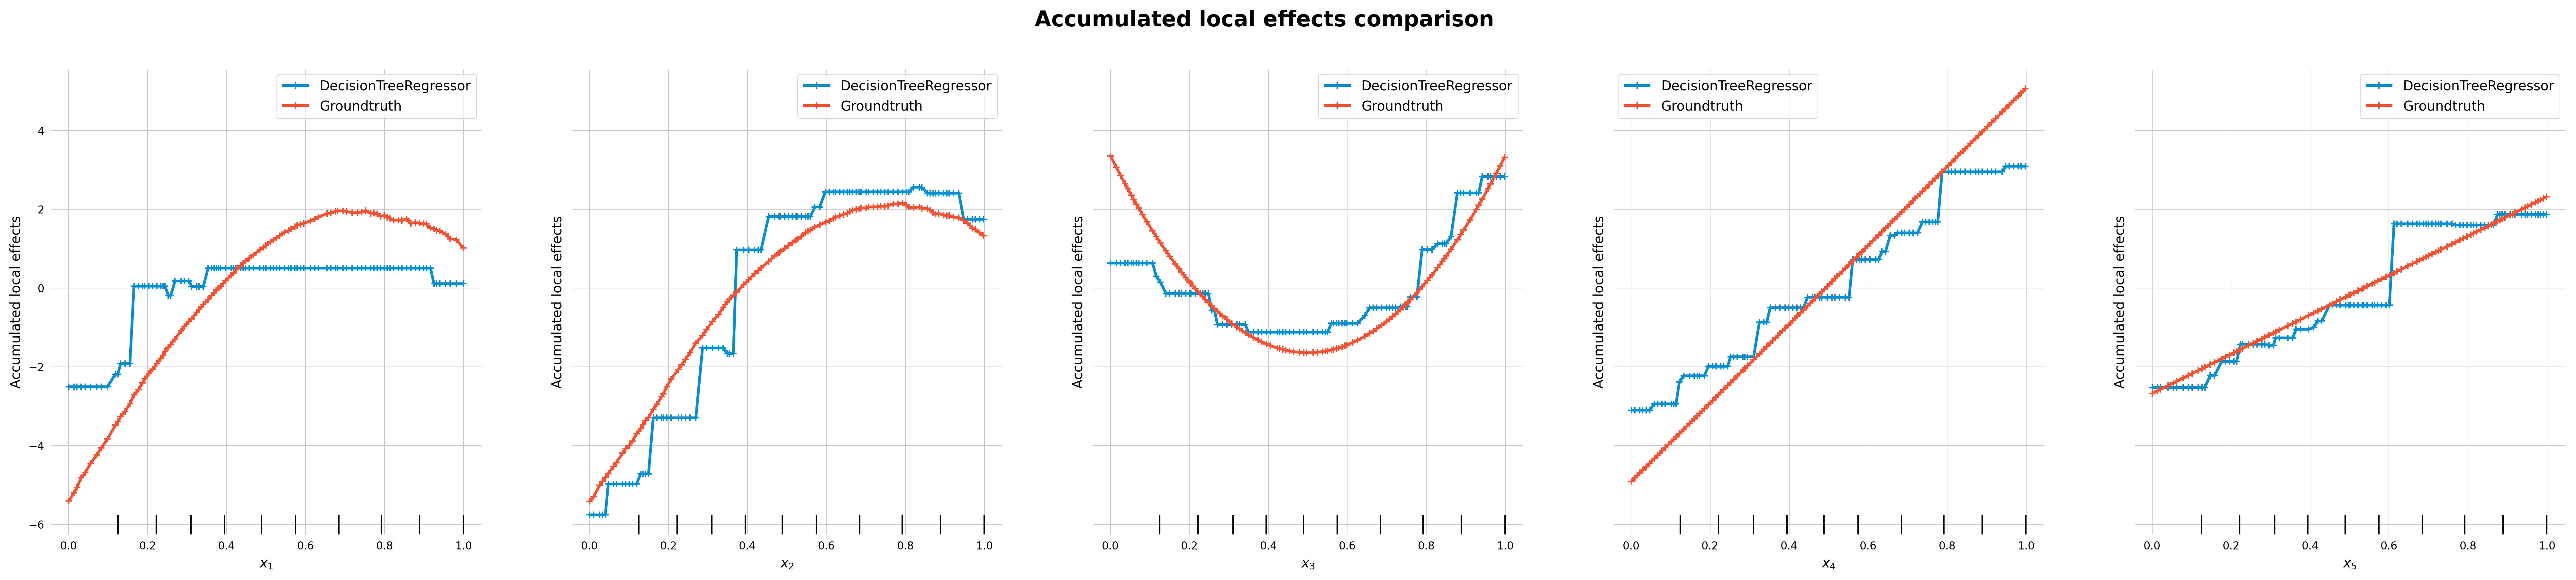

In [19]:
%matplotlib inline
plot_effect_comparison(tree, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

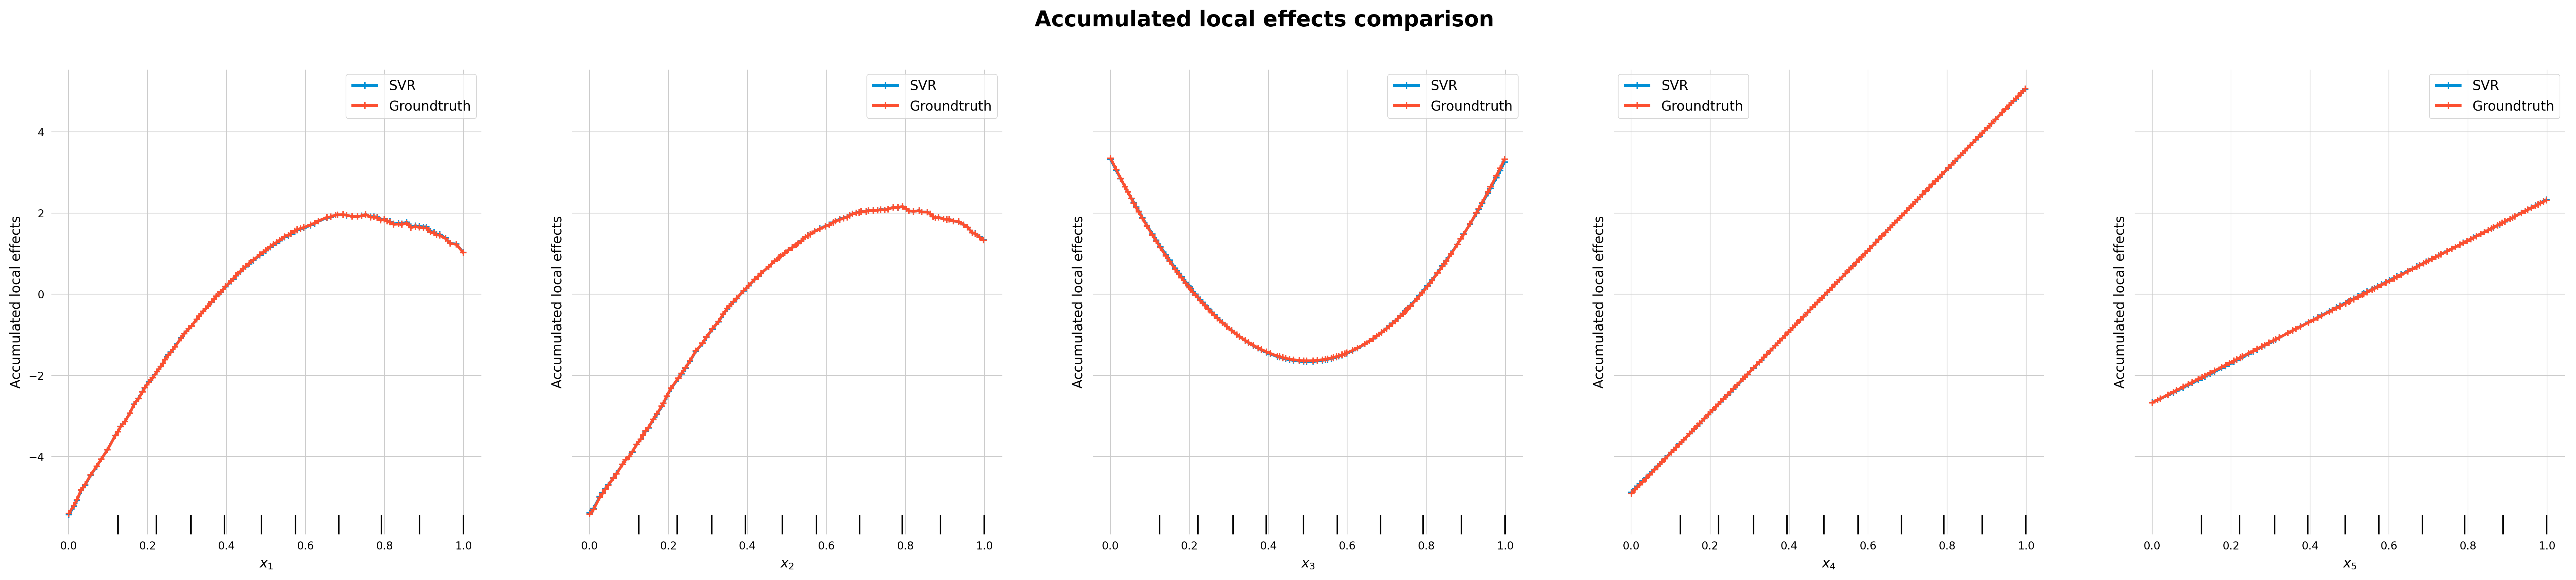

In [20]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

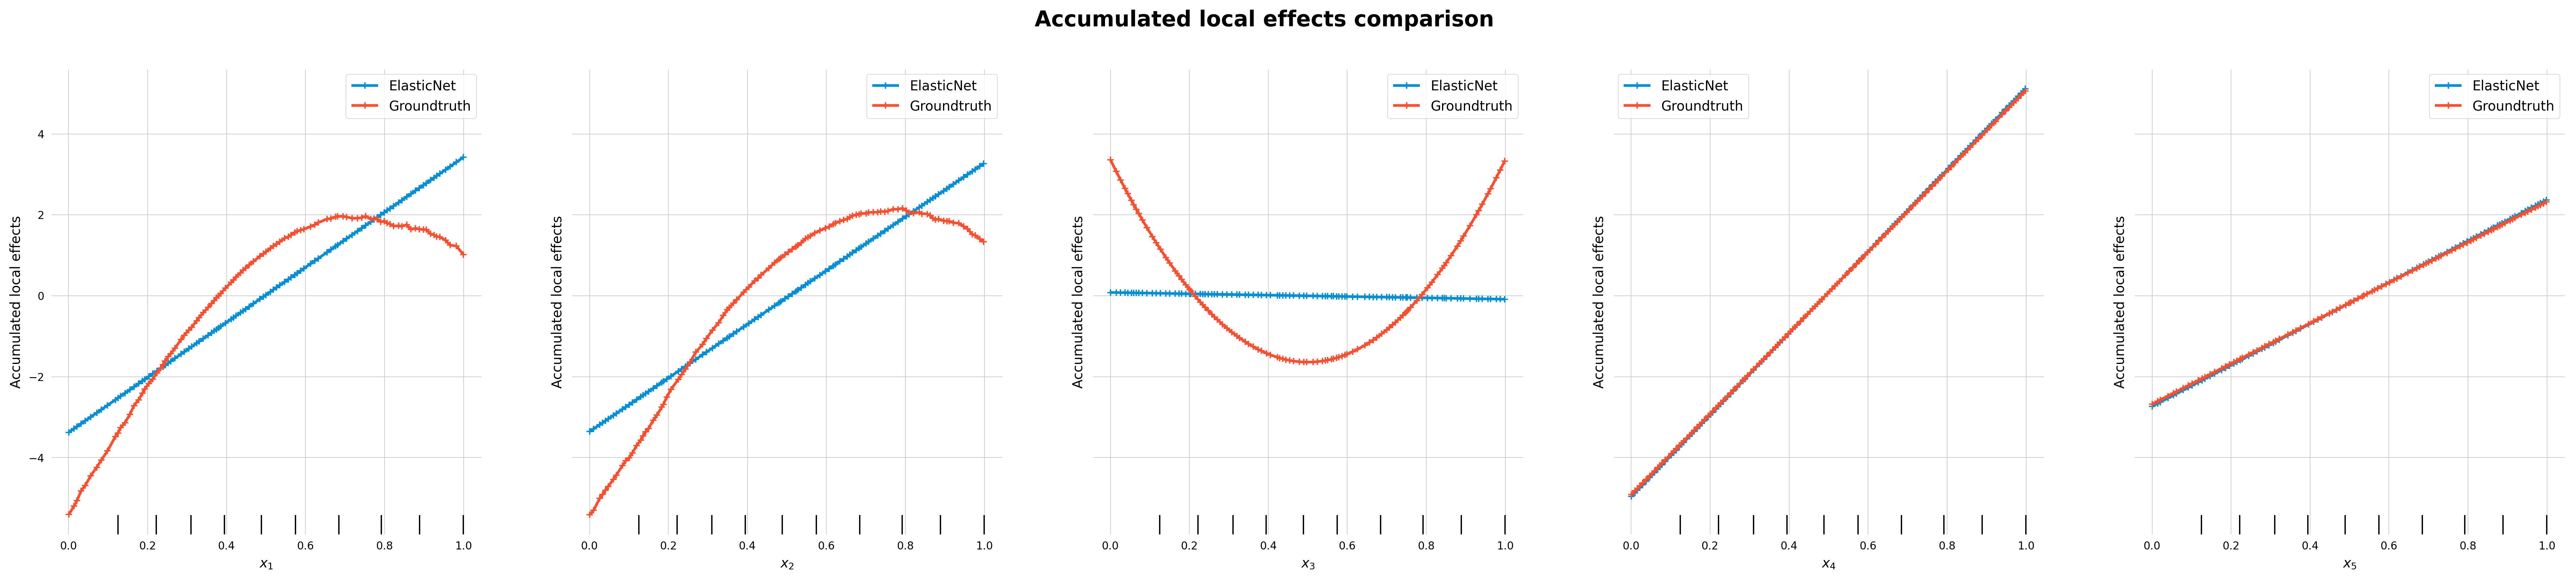

In [21]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

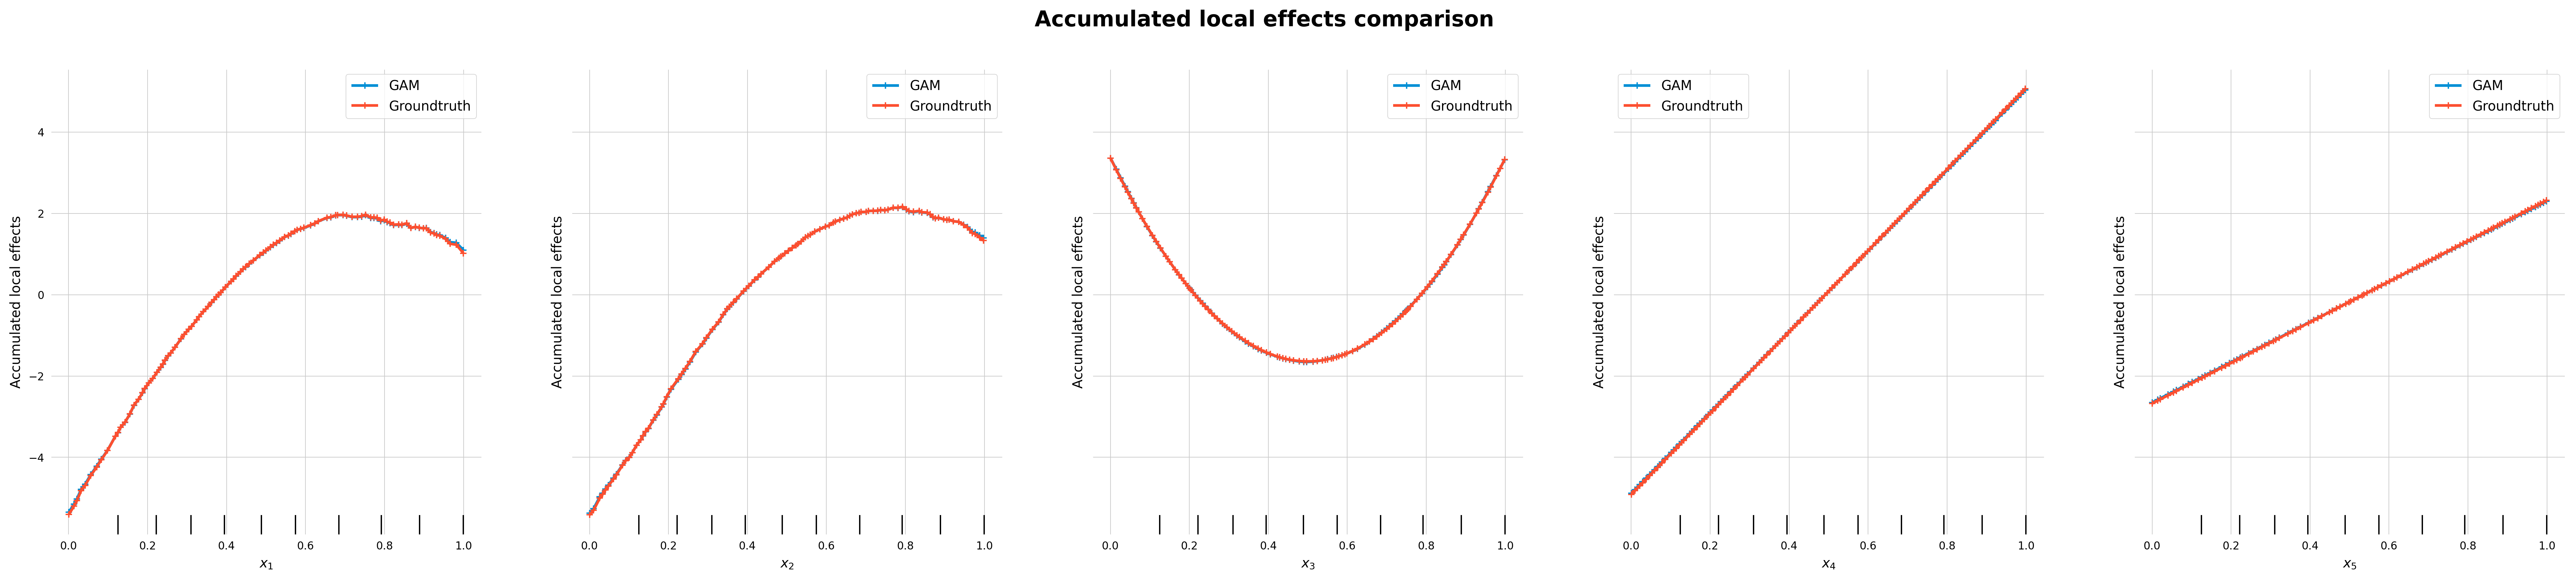

In [22]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);